<a href="https://colab.research.google.com/github/rijalsankalp/Handwritten-Devanagari-Character-Recognition/blob/main/training_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import img_to_array
import numpy as np
from sklearn.model_selection import train_test_split
import os
import cv2

In [3]:
from google.colab import drive
drive.mount('/content/drive')
#print(os.listdir('drive/MyDrive'))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
for_train = "drive/MyDrive/dhcd/train"
for_test = "drive/MyDrive/dhcd/test"

train_x=[]
train_y =[]
val_x = []
val_y =[]
count = 0

for folder in os.listdir(for_train):
  character_path = for_train + "/" + folder
  for img in os.listdir(character_path):
    count = count + 1
    print(count)
    character_img = character_path + "/" + img
    img_arr = np.array( cv2.imread(character_img, cv2.IMREAD_GRAYSCALE))/255.0
    img_arr = img_arr.reshape(32, 32,1)
    train_x.append(img_arr)
    train_y.append(int(str(folder)))

train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size = 0.2, random_state = 42)
test_y=[]
test_x =[]
for folder in os.listdir(for_test):
  character_path = for_test + "/" + folder
  for img in os.listdir(character_path):
    count = count + 1
    print(count)
    character_img = character_path + "/" + img
    img_arr = np.array(cv2.imread(character_img, cv2.IMREAD_GRAYSCALE))/255.0
    img_arr = img_arr.reshape(32, 32,1)
    test_x.append(img_arr)
    test_y.append(int(str(folder)))

In [5]:
train_x = np.array(train_x)
val_x = np.array(val_x)
train_y = np.array(train_y)
val_y = np.array(val_y)

test_x = np.array(test_x)
test_y = np.array(test_y)

In [15]:
model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='', input_shape=(32,32,1), padding='same'),
    keras.layers.AveragePooling2D(),
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='relu', padding='valid'),
    keras.layers.Flatten(),
    keras.layers.Dense(120, activation='tanh'),
    keras.layers.Dense(84, activation='tanh'),
    keras.layers.Dense(61, activation='softmax')
])

In [ ]:
model.summary()

In [16]:
model.compile(optimizer='sgd', loss = keras.losses.sparse_categorical_crossentropy, metrics = ['accuracy'])

In [ ]:
history = model.fit(train_x, train_y, epochs=7, validation_data=(val_x, val_y))

Epoch 1/7
1155/2312 [=============>................] - ETA: 33s - loss: 0.7533 - accuracy: 0.7848

In [11]:
import matplotlib.pyplot as plt

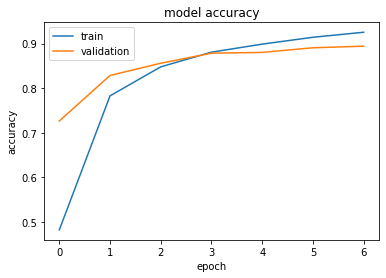

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

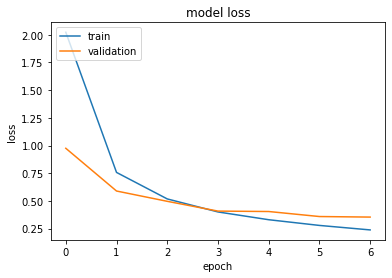

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(test_x, test_y)

In [ ]:
model.save('lenetmodel', save_format="h5")